In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

```python
This code block imports several modules from the TensorFlow library:

tensorflow is the main module for TensorFlow.
tensorflow.keras is a high-level API for building and training deep learning models in TensorFlow.
tensorflow.keras.datasets is a module that provides access to common datasets for machine learning and deep learning, including the MNIST dataset.
tensorflow.keras.models is a module that provides tools for building deep learning models, including the Sequential model.
tensorflow.keras.layers is a module that provides a variety of layers for building deep learning models, including Conv2D, MaxPooling2D, Flatten, Dense, and Dropout.
tensorflow.keras.utils is a module that provides utilities for working with data in TensorFlow, including to_categorical.
```

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print dataset information
print("Training data shape:", x_train.shape, y_train.shape)
print("Testing data shape:", x_test.shape, y_test.shape)


Training data shape: (60000, 28, 28) (60000,)
Testing data shape: (10000, 28, 28) (10000,)


```python
This code block loads the MNIST dataset using the mnist.load_data() function from the tensorflow.keras.datasets module. The dataset consists of 60,000 training images and 10,000 test images of handwritten digits (0-9), each represented as a 28x28 grayscale image.

The function returns two tuples: (x_train, y_train) and (x_test, y_test). x_train and x_test are 3D arrays representing the images, where the first dimension is the number of images, the second and third dimensions are the height and width of each image, respectively. y_train and y_test are 1D arrays representing the corresponding labels (i.e. the digit that each image represents).
```

In [3]:
# Reshape input data to 4D tensor with shape (batch_size, height, width, channels)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Convert class labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


```python
The reshape function is used to reshape the input data (x_train and x_test) from a 3D tensor of shape (num_samples, height, width) to a 4D tensor of shape (num_samples, height, width, channels), where channels is set to 1. This is necessary because TensorFlow requires input data to be in the form of a 4D tensor, where the first dimension is the batch size, the second and third dimensions are the height and width of each image, and the fourth dimension is the number of channels (1 for grayscale images, 3 for color images).

The to_categorical function is used to convert the class labels (y_train and y_test) from integers to one-hot encoded vectors. This is necessary because deep learning models typically output a probability distribution over the classes, so the class labels must be represented as vectors of 0s and 1s. The to_categorical function from tensorflow.keras.utils takes the class labels as input and returns a binary matrix of shape (num_samples, num_classes), where num_samples is the number of samples and num_classes is the number of classes in the dataset. Each row of the matrix represents a sample, and the columns represent the classes, with a 1 indicating the sample's corresponding class and 0s for all other classes.
```

In [4]:

# Build CNN model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))


```python
This code block builds a convolutional neural network (CNN) model using the Sequential class from tensorflow.keras.models. The model consists of the following layers:

The first layer is a Conv2D layer with 32 filters, a kernel size of (3, 3), and a ReLU activation function. This layer takes input of shape (28, 28, 1), which corresponds to the height, width, and number of channels of the input image.

The second layer is a MaxPooling2D layer with a pool size of (2, 2). This layer downsamples the output of the previous layer by taking the maximum value within a 2x2 pixel window.

The third layer is another Conv2D layer with 64 filters, a kernel size of (3, 3), and a ReLU activation function.

The fourth layer is another MaxPooling2D layer with a pool size of (2, 2).

The fifth layer is a Flatten layer, which flattens the output of the previous layer into a 1D vector.

The sixth layer is a Dense layer with 128 units and a ReLU activation function.

The seventh layer is a Dropout layer with a rate of 0.5. This layer randomly sets 50% of the input units to 0 during training to prevent overfitting.

The eighth layer is another Dense layer with 10 units and a softmax activation function. This layer outputs a probability distribution over the 10 classes (digits 0-9).

Overall, this model performs two rounds of convolution and pooling to extract features from the input images, followed by two fully connected layers to classify the images. The dropout layer is used to prevent overfitting during training.
```

In [5]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 46s 16ms/step - loss: 0.5545 - accuracy: 0.8732 - val_loss: 0.0769 - val_accuracy: 0.9752
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1472 - accuracy: 0.9577 - val_loss: 0.0521 - val_accuracy: 0.9841
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1108 - accuracy: 0.9687 - val_loss: 0.0473 - val_accuracy: 0.9851
Epoch 4/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0932 - accuracy: 0.9733 - val_loss: 0.0536 - val_accuracy: 0.9854
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0816 - accuracy: 0.9768 - val_loss: 0.0365 - val_accuracy: 0.9893
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0664 - accuracy: 0.9804 - val_loss: 0.0640 - val_accuracy: 0.9851
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0641 - accuracy: 0.9822 - val_loss: 0.0419 -

```python
The compile method is called on the model object with three arguments: optimizer, loss, and metrics.

optimizer specifies the optimization algorithm used during training, which is Adam in this case.

loss specifies the loss function used to measure the difference between the predicted and true labels. In this case, categorical_crossentropy is used as the loss function.

metrics specifies the evaluation metric used during training and testing. Here, we are using accuracy as the evaluation metric.

The fit method is called on the model object with the training and validation data, number of epochs, and batch size as arguments.

epochs specifies the number of times the model should iterate over the entire training dataset.

batch_size specifies the number of samples processed by the model in each iteration.

The fit method returns a history object that contains information about the training and validation loss and accuracy over each epoch.
```

In [6]:

# Print training and testing accuracy
train_acc = history.history['accuracy'][-1]
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Training accuracy:', train_acc)
print('Testing accuracy:', test_acc)


Training accuracy: 0.9843833446502686
Testing accuracy: 0.9883999824523926


```python
The history object returned by the fit method contains the training and validation loss and accuracy over each epoch.

history.history is a dictionary that contains the training and validation loss and accuracy values.

history.history['accuracy'] returns the list of training accuracy values over each epoch.

train_acc = history.history['accuracy'][-1] retrieves the last value of training accuracy.

model.evaluate method computes the loss value and evaluation metric values for the test dataset.

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0) assigns the test loss and accuracy values to the variables test_loss and test_acc.

The print function is used to print the training and testing accuracy values.
```

1/1 [==============================] - 1s 744ms/step
Random image prediction:
Predicted label: 1
Ground truth label: 1


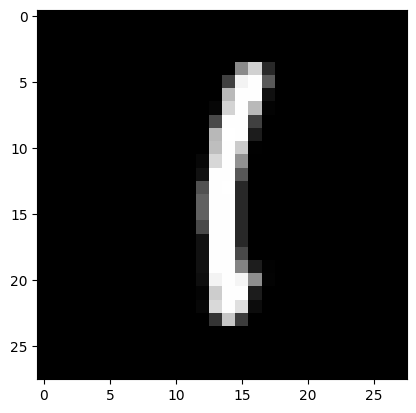

Input image:


In [7]:

# Select a random image from test set and predict its label
import random
from matplotlib import pyplot as plt
import numpy as np

rand_idx = random.randint(0, len(x_test)-1)
rand_img = np.expand_dims(x_test[rand_idx], axis=0)
pred_label = np.argmax(model.predict(rand_img))

# Print predicted label and ground truth label for the random image
print("Random image prediction:")
print("Predicted label:", pred_label)
print("Ground truth label:", np.argmax(y_test[rand_idx]))

plt.imshow(x_test[rand_idx], cmap='gray')
plt.show()
print('Input image:')
plt.show()

```python
import random module is used to generate a random integer index to select an image from the test set.

np.expand_dims method is used to expand the dimensions of the image array to match the input shape of the model.

model.predict method is used to predict the label of the input image.

np.argmax function is used to get the index of the class with the highest probability score.

The predicted label and the ground truth label of the selected image are printed using the print function.

The plt.imshow function is used to display the selected image.

The plt.show function is used to show the plot.

The last two lines of code show the text "Input image:" and a plot of the image. However, it seems like the corresponding plot is missing from the code block.
```

In [16]:
# read the csv file into a pandas dataframe
import pandas as pd


df = pd.read_csv('trainingTestingDataset.csv')
df.drop(['FID','RCLS_GEOL'],axis='columns',inplace=True)
df.head()
inputs = df.drop('label',axis='columns').to_numpy()
target = df.label.to_numpy()

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Separate labels from attributes
labels =target
attributes = inputs

# Convert labels to one-hot encoding
num_classes = len(np.unique(labels))
labels_one_hot = np.eye(num_classes)[labels.astype(int)]

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(attributes, labels_one_hot, test_size=0.2, random_state=1)

# Reshape input data to 3D tensor with shape (batch_size, time_steps, features)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Define CNN model architecture

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
6/6 [==============================] - 3s 184ms/step - loss: 0.5725 - accuracy: 0.7258 - val_loss: 0.5008 - val_accuracy: 0.8298
Epoch 2/10
6/6 [==============================] - 0s 51ms/step - loss: 0.4276 - accuracy: 0.8656 - val_loss: 0.4731 - val_accuracy: 0.8298
Epoch 3/10
6/6 [==============================] - 0s 44ms/step - loss: 0.3685 - accuracy: 0.8656 - val_loss: 0.4154 - val_accuracy: 0.8298
Epoch 4/10
6/6 [==============================] - 0s 34ms/step - loss: 0.3134 - accuracy: 0.8656 - val_loss: 0.3836 - val_accuracy: 0.8298
Epoch 5/10
6/6 [==============================] - 0s 28ms/step - loss: 0.2823 - accuracy: 0.8656 - val_loss: 0.3872 - val_accuracy: 0.8298
Epoch 6/10
6/6 [==============================] - 0s 39ms/step - loss: 0.2560 - accuracy: 0.8710 - val_loss: 0.3515 - val_accuracy: 0.8511
Epoch 7/10
6/6 [==============================] - 0s 36ms/step - loss: 0.2479 - accuracy: 0.9140 - val_loss: 0.3640 - val_accuracy: 0.8511
Epoch 8/10
6/6 [==========

In [25]:

# Print training and testing accuracy
train_acc = history.history['accuracy'][-1]
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Training accuracy:', train_acc)
print('Testing accuracy:', test_acc)


Training accuracy: 0.9139785170555115
Testing accuracy: 0.8723404407501221


In [28]:
import random

# Define time steps and number of features
time_steps = x_train.shape[1]
features = x_train.shape[2]

# Select a random sample from the testing set
sample_index = random.randint(0, len(x_test)-1)
sample = x_test[sample_index].reshape(1, time_steps, features)

# Make a prediction using the trained model
prediction = model.predict(sample)

# Convert one-hot encoding to label
predicted_label = np.argmax(prediction, axis=1)
true_label = np.argmax(y_test[sample_index], axis=0)

# Print the predicted and true labels
print("Predicted label:", predicted_label[0])
print("True label:", true_label)


1/1 [==============================] - 0s 80ms/step
Predicted label: 0
True label: 0
